<h1 style="text-align: center;">Customer Segmentation using RFM Analysis</h1>


<img src="https://media.licdn.com/dms/image/C5612AQFGkBiAUIMQig/article-cover_image-shrink_600_2000/0/1607110048550?e=2147483647&v=beta&t=tfwgvOxMrkMPsmt39GbFXY22pcJwbBuTRORZ8-q05UE" width="100%" />


<br>In this report, we will delve into two crucial topics: **Customer Segmentation** and **RFM Analysis** (Recency, Frequency, and Monetary Analysis).

## Customer Segmentation

Customer segmentation involves dividing a customer base into distinct groups based on various attributes. This process helps businesses:

- **Tailor marketing strategies**: Target specific groups with personalized campaigns.
- **Optimize resource allocation**: Focus efforts on the most valuable segments.
- **Improve customer satisfaction**: Address the unique needs and preferences of each segment.

By identifying different segments, businesses can enhance engagement and increase revenue.

### RFM Analysis

**RFM Analysis** is a powerful technique used to evaluate and segment customers based on three key metrics:

- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much money a customer spends.

This analysis helps businesses understand customer behavior and identify high-value customers who are most likely to respond to marketing efforts. It provides valuable insights into customer loyalty and purchasing patterns, allowing for more targeted and effective marketing strategies.

### Combining RFM Analysis with Clustering

To further refine customer segmentation, we can employ clustering algorithms, such as **K-means**, to group customers into clusters based on the RFM attributes. This method allows us to:

- **Create distinct segments**: Group customers into unique clusters based on recency, frequency, and monetary value.
- **Uncover patterns and trends**: Analyze data to identify trends within each cluster.
- **Gain actionable insights**: Use these insights to develop more precise and effective marketing strategies.

By applying clustering techniques, we can enhance our understanding of customer behavior and tailor our strategies for better results.

#### To start with the project, we will first import all the necessaries libraraies.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import datetime as dt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm

#### Data Loading and Citation

The dataset used in this analysis is the **Online Retail II** dataset, which is available from the UCI Machine Learning Repository. This dataset provides transaction data for a UK-based online retailer.

##### Citation

Chen, Daqing. (2019). *Online Retail II*. UCI Machine Learning Repository. [https://doi.org/10.24432/C5CG6D](https://doi.org/10.24432/C5CG6D).

##### Dataset URL

You can access the dataset directly through the following link: [Online Retail II Dataset](https://archive.ics.uci.edu/dataset/502/online+retail+ii).

##### Data Variables Information

**Invoice**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.<br> 
**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.<br> 
**Description**: Product (item) name.<br> 
**Quantity**: The quantities of each product (item) per transaction.<br> 
**InvoiceDate**:o Invice date and time. Numeric. The day and time when a transaction was generate.<br> 
**Price**: Unit price. Numeric. Product price per unit in sterling pounds £).<br>
**Customer ID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. Nominal. The name of the country where a customer resides.

In [8]:
# Replace 'file.csv' with the actual name of your CSV file
df = pd.read_excel('online_retail.xlsx')
len(df)

525461

In [9]:
df.tail(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525441,538171,22837,HOT WATER BOTTLE BABUSHKA,2,2010-12-09 20:01:00,4.65,17530.0,United Kingdom
525442,538171,85152,HAND OVER THE CHOCOLATE SIGN,3,2010-12-09 20:01:00,2.10,17530.0,United Kingdom
525443,538171,21329,DINOSAURS WRITING SET,2,2010-12-09 20:01:00,1.65,17530.0,United Kingdom
525444,538171,21327,SKULLS WRITING SET,2,2010-12-09 20:01:00,1.65,17530.0,United Kingdom
525445,538171,22666,RECIPE BOX PANTRY YELLOW DESIGN,1,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525446,538171,22154,ANGEL DECORATION 3 BUTTONS,48,2010-12-09 20:01:00,0.42,17530.0,United Kingdom
525447,538171,21875,KINGS CHOICE MUG,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525448,538171,21871,SAVE THE PLANET MUG,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525449,538171,21877,HOME SWEET HOME MUG,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525450,538171,22747,POPPY'S PLAYHOUSE BATHROOM,2,2010-12-09 20:01:00,2.10,17530.0,United Kingdom


In [10]:
# Count number of InvoiceNo starting with 'C'
df['Invoice'] = df['Invoice'].astype(str)
count_c_invoices = df['Invoice'].str.startswith('c').sum()

print(f"Number of invoice codes starting with 'C': {count_c_invoices}")

Number of invoice codes starting with 'C': 0


According to the data information, Invoice code starting with 'c' is a cancelled transaction but we can see that our data doesn't contain such records.

#### Handle duplicates and missing values

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

missing_values1 = df.isnull().sum()
print("Missing Values:\n", missing_values1)

# Remove rows with missing CustomerID
df = df[df['Customer ID'].notna()]

missing_values2 = df.isnull().sum()
print("Missing Values:\n", missing_values2)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicates:", duplicates)

# Drop duplicates if necessary
df = df.drop_duplicates()



# Get a concise summary of the DataFrame
info_summary = df.info()

# Check data types
data_types = df.dtypes
print("\nData Types:\n", data_types)

# Generate descriptive statistics
summary_stats = df.describe()
print("\nSummary Statistics:\n", summary_stats)

Missing Values:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Missing Values:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Missing Values:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
Duplicates: 6771
<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         


#### Plot the data distribution for outliers

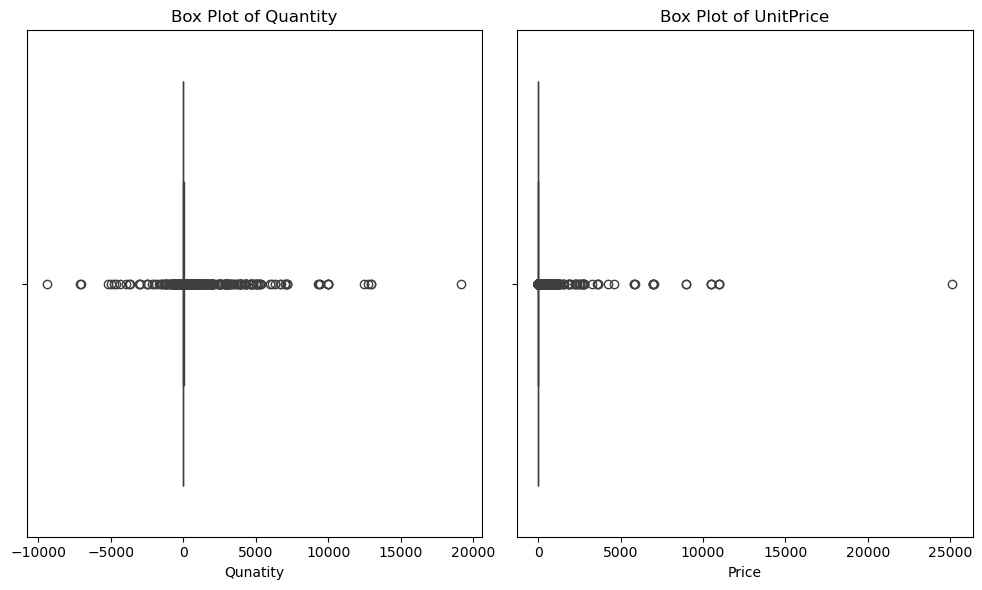

In [15]:
# Box plot for Quantity
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Qunatity')


# Box plot for UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'])
plt.title('Box Plot of UnitPrice')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

#### Remove Outliers

In [17]:
# Remove rows with negative values in 'Quantity' and 'UnitPrice'
df = df[(df['Quantity'] >= 0) & (df['Price'] >= 0)]

# Calculate Z-scores
df['Z_Quantity'] = stats.zscore(df['Quantity'])
df['Z_UnitPrice'] = stats.zscore(df['Price'])

# Filter based on Z-score threshold
df = df[(df['Z_Quantity'].abs() <= 3) & (df['Z_UnitPrice'].abs() <= 3)]    

# Remove rows with zero quantity
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In this analysis, zero values for UnitPrice may arise from promotional activities or sales vouchers. However, such entries will be excluded from the analysis to maintain the integrity of the dataset. Similarly, zero values for Quantity could be attributable to canceled or returned items. Given that the dataset lacks information regarding the status of these transactions (e.g., whether they were canceled or returned), these zero values will also be excluded from the analysis. This approach ensures that the data used is relevant and consistent with the objectives of the analysis.

####  Plot Distribution Histogram for Unit Price and Quantity

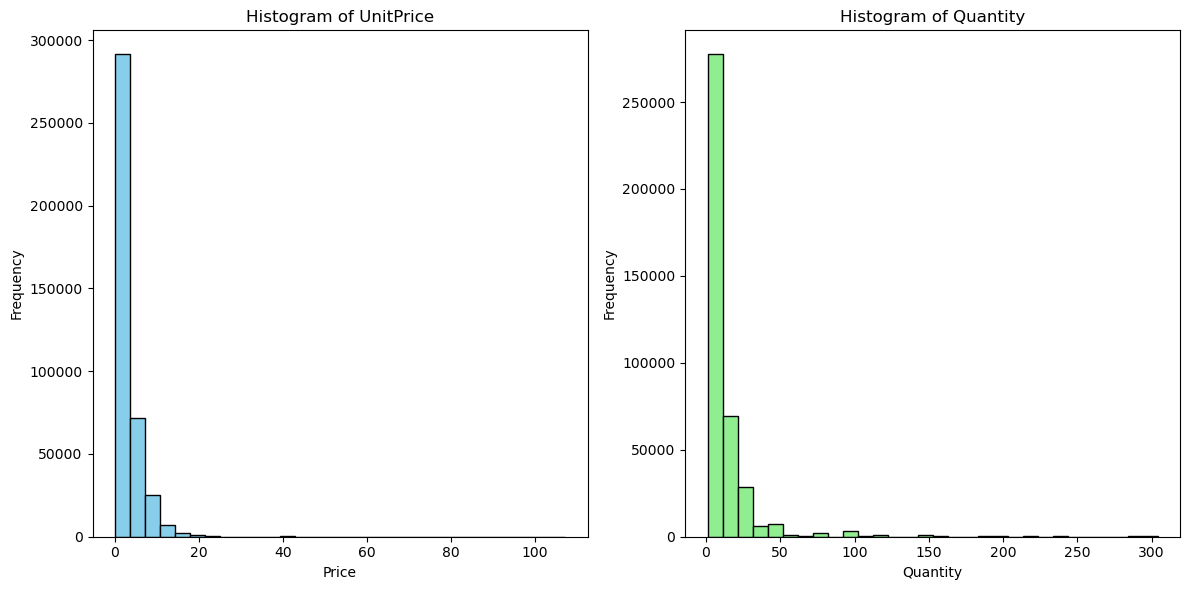

In [20]:
# Plot histogram for UnitPrice
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of UnitPrice')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot histogram for Quantity
plt.subplot(1, 2, 2)
plt.hist(df['Quantity'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Data Imbalance Check on Country and Customer ID
The United Kingdom was chosen for this analysis because it represents a significant portion of the customer base, providing a more substantial and homogeneous dataset. Focusing on a single country eliminates the variability introduced by different market conditions, customer behaviors, and economic factors across countries, leading to more accurate and meaningful insights specific to that region.

In [22]:
# Data imbalance check for Country
country_counts = df['Country'].value_counts()
print("Country Counts:\n", country_counts)

# Data imbalance check for CustomerID
customer_counts = df['Customer ID'].value_counts()
print("CustomerID Counts:\n", customer_counts)

# Filter data for the United Kingdom
df = df[df['Country'] == 'United Kingdom']


# Change Customer ID datatype to Integer
df['Customer ID'] = df['Customer ID'].astype(int)

# Verify the data type conversion
print(df.dtypes)

Country Counts:
 Country
United Kingdom          363323
EIRE                      8418
Germany                   7636
France                    5408
Netherlands               2673
Spain                     1216
Switzerland               1169
Belgium                   1032
Portugal                   981
Sweden                     844
Channel Islands            820
Italy                      705
Australia                  626
Cyprus                     533
Austria                    522
Greece                     512
Denmark                    364
Norway                     363
Finland                    347
United Arab Emirates       314
Unspecified                277
USA                        227
Poland                     182
Malta                      168
Japan                      162
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA           

In [23]:
# Recalculate IQR and identify outliers
# For Quantity
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
outliers_quantity = df[(df['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) |
                       (df['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity))]

# For UnitPrice
Q1_unitprice = df['Price'].quantile(0.25)
Q3_unitprice = df['Price'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice
outliers_unitprice = df[(df['Price'] < (Q1_unitprice - 1.5 * IQR_unitprice)) |
                        (df['Price'] > (Q3_unitprice + 1.5 * IQR_unitprice))]

# Count the number of outliers
num_outliers_quantity = outliers_quantity.shape[0]
num_outliers_unitprice = outliers_unitprice.shape[0]

print("Number of outliers in Quantity:", num_outliers_quantity)
print("Number of outliers in Price:", num_outliers_unitprice)

Number of outliers in Quantity: 20919
Number of outliers in Price: 28596


##### Creating Total column by multiplying price with quantity

In [25]:
# Calculate Total Spending
df['Total'] = df['Quantity'] * df['Price']

### RFM Analysis

In this part of analysis, we will be following few steps:
1. Creating RFM dataframe based upon the calculation for all the unique customer:  
   a. Recency = Latest Invoice month difference with the reference month which is the the last invoice date in the whole dataset + 1.  
   b. Frequency = Number of times, the customer has made a purchase. Invoice count.  
   c. Monetary = Sum of all the total spend by the customer  
2. Assign score to each attributes from 1-5 from lowest to highest desirable score.
3. Use K-means Cluster analysis on this RFM Tbale to cluster the customer.
4. Do further segmentation and analysis based upon additional features such as demographic information if data available.

In [28]:
# Set reference date for recency calculation (one month beyond the maximum InvoiceDate)
max_invoice_date = df['InvoiceDate'].max()
ref_date = max_invoice_date + pd.DateOffset(months=1)

# Function to calculate recency in months
def calculate_recency(invoice_dates, ref_date):
    max_date = invoice_dates.max()
    if pd.isnull(max_date):
        return np.nan
    return (ref_date.year - max_date.year) * 12 + (ref_date.month - max_date.month)

# Create a DataFrame to store CustomerID and their Max InvoiceDate
customer_max_invoice_date = df.groupby('Customer ID')['InvoiceDate'].max().reset_index()

# Calculate recency in months
customer_max_invoice_date['Recency'] = customer_max_invoice_date['InvoiceDate'].apply(lambda x: calculate_recency(pd.Series([x]), ref_date))

# Filter the records where recency is 1, 0, or NaN
filtered_customers = customer_max_invoice_date[customer_max_invoice_date['Recency'].isin([0, 1]) | customer_max_invoice_date['Recency'].isna()]

print("Filtered Customers with Recency 1, 0, or NaN:")
print(filtered_customers)


Filtered Customers with Recency 1, 0, or NaN:
      Customer ID         InvoiceDate  Recency
4           12747 2010-12-05 15:38:00        1
5           12748 2010-12-09 13:22:00        1
13          12826 2010-12-09 15:21:00        1
19          12838 2010-12-01 11:57:00        1
20          12839 2010-12-07 15:48:00        1
...           ...                 ...      ...
3897        18225 2010-12-09 15:46:00        1
3899        18229 2010-12-08 10:51:00        1
3905        18239 2010-12-02 17:48:00        1
3921        18259 2010-12-08 13:38:00        1
3928        18269 2010-12-08 13:53:00        1

[528 rows x 3 columns]


In [29]:
# Set reference date for recency calculation (one month beyond the maximum InvoiceDate)
max_invoice_date = df['InvoiceDate'].max()
ref_date = max_invoice_date + pd.DateOffset(months=1)

# Function to calculate recency in months
def calculate_recency(invoice_dates, ref_date, customer_id):
    max_date = invoice_dates.max()
    if pd.isnull(max_date):
        print(f"NaN encountered for CustomerID: {customer_id}, InvoiceDates: {invoice_dates.values}")
        return np.nan
    return (ref_date.year - max_date.year) * 12 + (ref_date.month - max_date.month)

# Create a helper function to use in the aggregation
def calculate_recency_lambda(x):
    customer_id = x.name  # Get the CustomerID for the group
    return calculate_recency(x, ref_date, customer_id)

# Create RFM table
rfm1 = df.groupby('Customer ID').agg({
    'InvoiceDate': calculate_recency_lambda,  # Recency in months
    'Invoice': 'count',  # Frequency
    'Total': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm1.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Check for NaN values in the Recency column
nan_recency = rfm1[rfm1['Recency'].isna()]

if not nan_recency.empty:
    print("Records with NaN Recency:\n", nan_recency)

print("RFM Table:\n", rfm1.head())


RFM Table:
    CustomerID  Recency  Frequency  Monetary
0       12346        7         33    372.86
1       12608        3         16    415.79
2       12745        5         22    723.85
3       12746        7         17    254.55
4       12747        1        153   5061.03


In [30]:
# Descriptive statistics for RFM table
print("RFM Descriptive Statistics:\n", rfm1.describe())
rfm1.info()

RFM Descriptive Statistics:
          CustomerID      Recency    Frequency       Monetary
count   3945.000000  3945.000000  3945.000000    3945.000000
mean   15565.117871     4.168061    92.097085    1718.248987
std     1581.496069     3.202733   179.760444    5592.995771
min    12346.000000     1.000000     1.000000       2.950000
25%    14205.000000     2.000000    18.000000     299.530000
50%    15586.000000     3.000000    43.000000     658.180000
75%    16944.000000     6.000000   101.000000    1626.080000
max    18287.000000    13.000000  4944.000000  228217.110000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3945 non-null   int64  
 1   Recency     3945 non-null   int64  
 2   Frequency   3945 non-null   int64  
 3   Monetary    3945 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 123.4 KB


### Significance of RFM Scores

#### Recency (R)
- **Highest Score**: Indicates that the customer has made a purchase very recently.
- **Significance**: Higher scores suggest recent engagement and a higher likelihood of responding to promotions.

#### Frequency (F)
- **Highest Score**: Indicates frequent purchases by the customer.
- **Significance**: Higher scores reflect customer loyalty and suggest they are more likely to engage with loyalty programs.

#### Monetary (M)
- **Highest Score**: Indicates the customer has spent the most money.
- **Significance**: Higher scores signify high-value customers who contribute significantly to revenue and may warrant special offers or services.

#### Summary

In RFM Analysis, **higher scores** across Recency, Frequency, and Monetary metrics generally indicate **more valuable customers**. Understanding these scores helps in targeting marketing efforts and improving customer retention.


In [32]:
# Calculate quintiles and assign bin edges
rfm1['Quantile_Bin'] = pd.qcut(rfm1['Recency'], 5, labels=False, duplicates='drop')
rfm1['Quantile_FBin'] = pd.qcut(rfm1['Frequency'], 5, labels=False, duplicates='drop')
rfm1['Quantile_MBin'] = pd.qcut(rfm1['Monetary'], 5, labels=False, duplicates='drop')

# Map quantile bins to scores
# Recency Higher quantiles (i.e., lower values in 'Recency') should get higher scores
rfm1['Recency_Score'] = rfm1['Quantile_Bin'].apply(lambda x: 5 - x)

# Frequency and Monetary Higher quantiles (i.e., higher values in 'Frequency') should get higher scores
rfm1['Frequency_Score'] = rfm1['Quantile_FBin'] + 1
rfm1['Monetary_Score'] = rfm1['Quantile_MBin'] + 1


# Print the resulting DataFrame
print(rfm1)

      CustomerID  Recency  Frequency  Monetary  Quantile_Bin  Quantile_FBin  \
0          12346        7         33    372.86             2              2   
1          12608        3         16    415.79             1              1   
2          12745        5         22    723.85             2              1   
3          12746        7         17    254.55             2              1   
4          12747        1        153   5061.03             0              4   
...          ...      ...        ...       ...           ...            ...   
3940       18283        2        217    619.37             0              4   
3941       18284        3         28    461.68             1              1   
3942       18285       11         12    427.00             3              0   
3943       18286        5         67   1296.43             2              3   
3944       18287        2         85   2345.71             0              3   

      Quantile_MBin  Recency_Score  Frequency_Score

In [33]:
# Drop the temporary 'Quantile_Bin' column
rfm1 = rfm1.drop(columns='Quantile_Bin')
rfm1 = rfm1.drop(columns='Quantile_FBin')
rfm1 = rfm1.drop(columns='Quantile_MBin')

In [34]:
rfm1.dtypes

CustomerID           int64
Recency              int64
Frequency            int64
Monetary           float64
Recency_Score        int64
Frequency_Score      int64
Monetary_Score       int64
dtype: object

Quartile is not the best method here as the scale for recency, frequncy, and monetary is different.

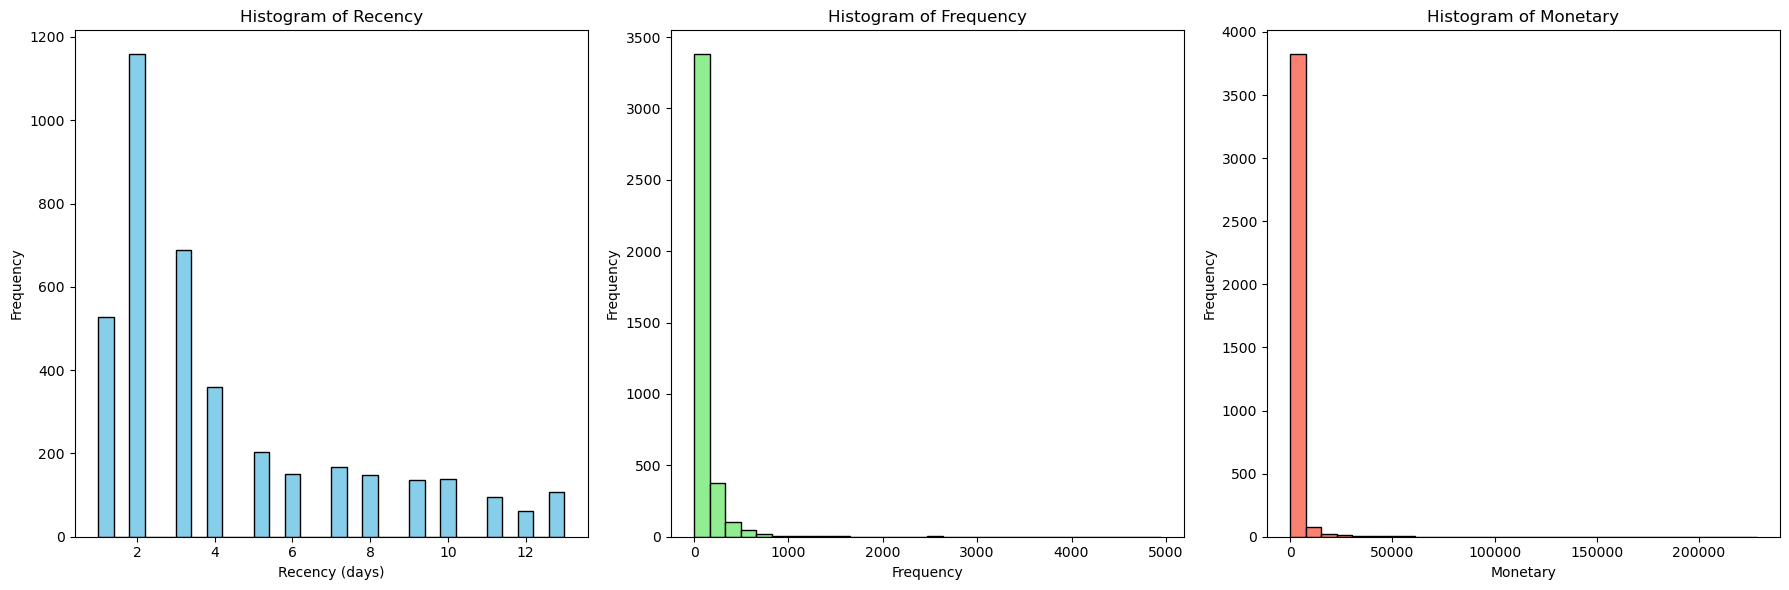

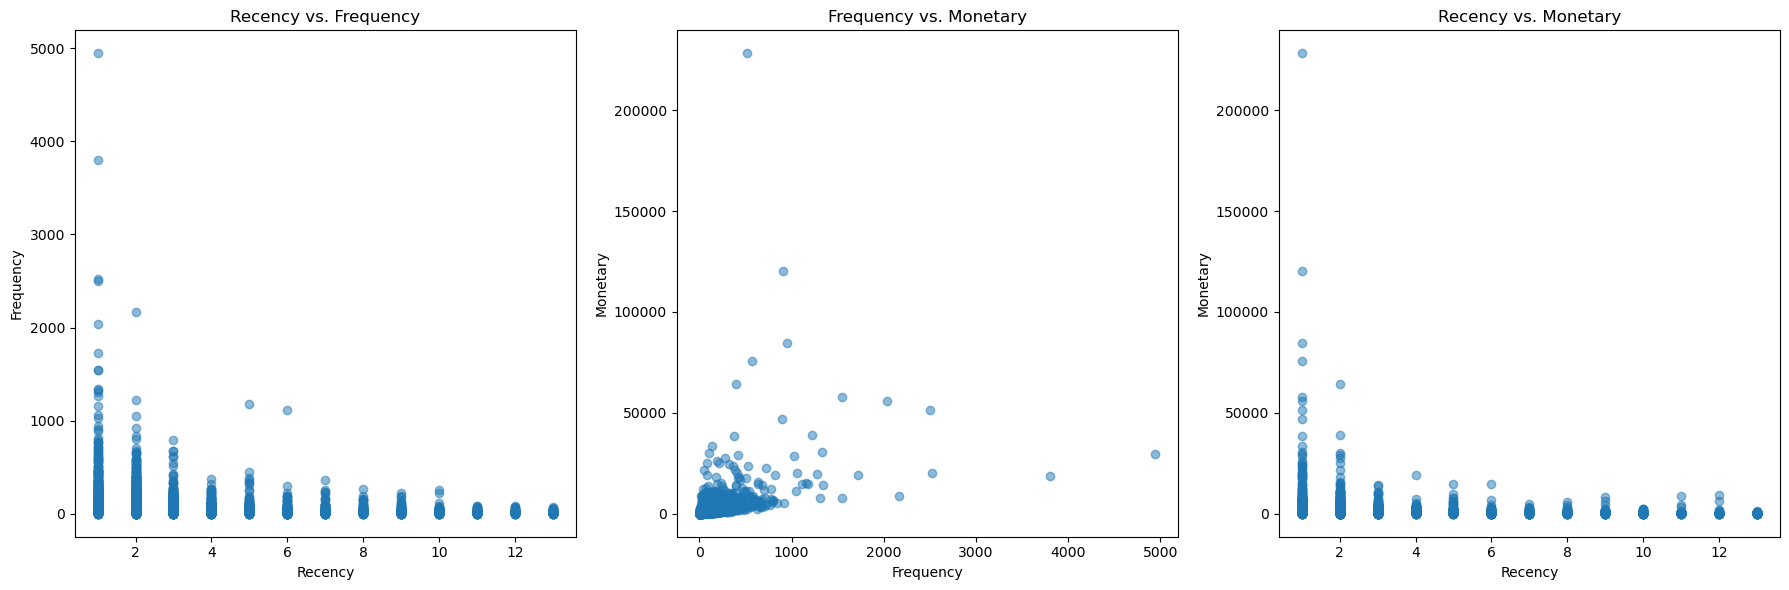

In [45]:
# Plot histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(rfm1['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rfm1['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rfm1['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Plot scatter plots for all combinations
plt.figure(figsize=(18, 6))

# Recency vs Frequency
plt.subplot(1, 3, 1)
plt.scatter(rfm1['Recency'], rfm1['Frequency'], alpha=0.5)
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
plt.scatter(rfm1['Frequency'], rfm1['Monetary'], alpha=0.5)
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
plt.scatter(rfm1['Recency'], rfm1['Monetary'], alpha=0.5)
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()


In [63]:
# Top Performers
top_customers = rfm1[(rfm1['Recency_Score'] == 5) & 
                     (rfm1['Frequency_Score'] == 5) & 
                     (rfm1['Monetary_Score'] == 5)]  # Highest RFM score
print("Top Customers:\n", top_customers['CustomerID'].head(20))
print("Customers with 555 score:", top_customers.shape[0])


# Low Value Customers
low_value_customers = rfm1[(rfm1['Recency_Score'] == 1) & 
                     (rfm1['Frequency_Score'] == 1) & 
                     (rfm1['Monetary_Score'] == 1)] # Lowest RFM Score
print("Low Value Customers:\n", low_value_customers['CustomerID'].head(20))
print("Customers with 111 score:", low_value_customers.shape[0])

Top Customers:
 4      12747
5      12748
6      12749
17     12836
19     12838
20     12839
22     12841
43     12867
48     12872
75     12921
96     12949
97     12951
116    12976
118    12978
120    12982
135    13004
143    13013
149    13021
163    13037
170    13047
Name: CustomerID, dtype: int64
Customers with 555 score: 434
Low Value Customers:
 Series([], Name: CustomerID, dtype: int64)
Customers with 111 score: 0


/var/folders/0j/hmfnsvln7w5bfgl9ldh_5bcw0000gn/T/ipykernel_81547/1894058781.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(rfm_scores))  # Create a colormap with the number of distinct RFM scores


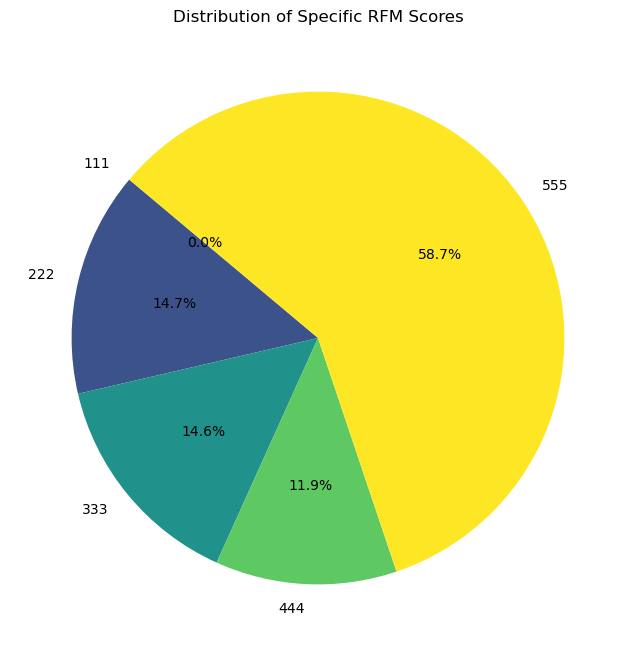

In [77]:
# Create the RFMScore column if not already created
rfm1['RFMScore'] = (
    rfm1['Recency_Score'].astype(int).astype(str) +
    rfm1['Frequency_Score'].astype(int).astype(str) +
    rfm1['Monetary_Score'].astype(int).astype(str)
)

# Define the RFM scores we are interested in
rfm_scores = ['111', '222', '333', '444', '555']

# Count the occurrences of each RFM score
rfm_counts = rfm1[rfm1['RFMScore'].isin(rfm_scores)]['RFMScore'].value_counts().reindex(rfm_scores, fill_value=0)

# Get a colormap and extract colors
cmap = cm.get_cmap('viridis', len(rfm_scores))  # Create a colormap with the number of distinct RFM scores
colors = [cmap(i) for i in range(cmap.N)]  # Extract colors

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rfm_counts, labels=rfm_scores, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Specific RFM Scores')
plt.show()

### K-means Unsupervised Algorithm for clustering purpose
K-means cluster analysis is applied to the RFM table to group customers into distinct segments based on their purchasing behaviors. This unsupervised machine learning technique helps in identifying patterns and similarities among customers, creating clusters that can be analyzed and targeted differently. It provides a scalable and efficient method to handle large datasets, revealing hidden insights and facilitating data-driven decision-making.

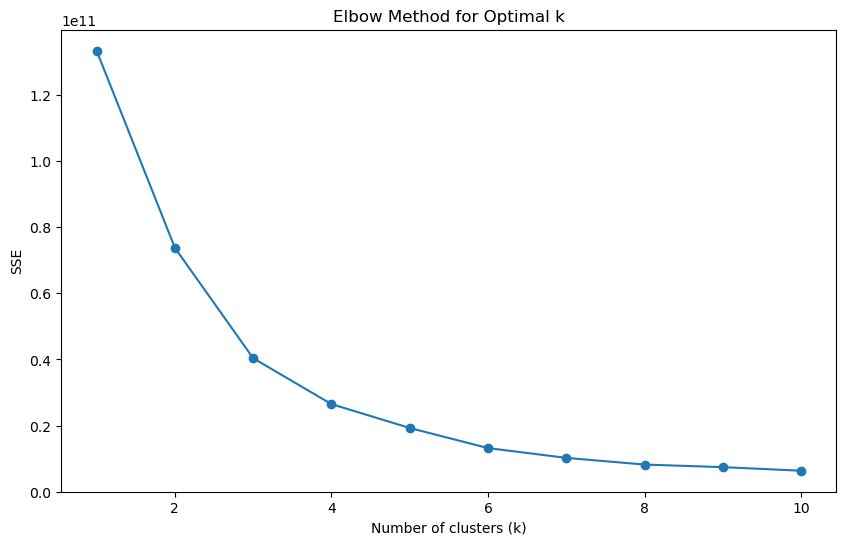

In [85]:
# K-means Clustering Algorithm
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm1)
    sse[k] = kmeans.inertia_

# Plot the SSE for each k to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 4 # based upon the graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm1['Cluster'] = kmeans.fit_predict(rfm1)

In [87]:
# Analyze cluster characteristics
cluster_analysis = rfm1.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).reset_index()

print("Cluster Analysis:\n", cluster_analysis)


Cluster Analysis:
    Cluster   Recency    Frequency       Monetary  Count
0        0  4.231952    78.480844    1173.748160   3837
1        1  1.125000  1224.250000   69609.531250      8
2        2  1.969697   524.101010   15047.749525     99
3        3  1.000000   512.000000  228217.110000      1


In [89]:
# Define segmentation based on RFM scores
def segment_customer(row):
    r, f, m = row['Recency_Score'], row['Frequency_Score'], row['Monetary_Score']
    if r == 5 and f == 5 and m == 5:
        return 'Champions'
    elif r >= 4 and f >= 4 and m >= 4:
        return 'Loyal Customers'
    elif r <= 3 and f <= 3 and m <= 3:
        return 'At Risk'
    elif r == 1 and f == 1:
        return 'New Customers'
    else:
        return 'Others'

# Apply the segmentation function to the dataframe
rfm1['Segment'] = rfm1.apply(segment_customer, axis=1)

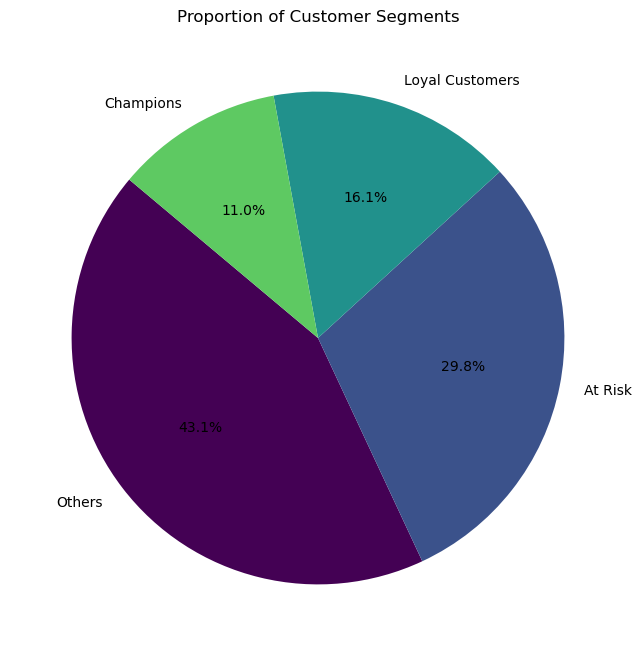

In [99]:
# Count the number of customers in each segment
segment_counts = rfm1['Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'Count']

# Print or display the table
#print(segment_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts['Count'], labels=segment_counts['Customer Segment'], autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Proportion of Customer Segments')
plt.show()

In [127]:
# Analyze segments
segment_summary = rfm1.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency_Score': 'mean',
    'Frequency_Score': 'mean',
    'Monetary_Score': 'mean'
}).rename(columns={'CustomerID': 'Number of Customers'})

print(segment_summary)


                 Number of Customers  Recency_Score  Frequency_Score  \
Segment                                                                
At Risk                         1177       2.491929         1.819031   
Champions                        434       5.000000         5.000000   
Loyal Customers                  635       4.658268         4.330709   
Others                          1699       4.206004         2.768099   

                 Monetary_Score  
Segment                          
At Risk                1.785047  
Champions              5.000000  
Loyal Customers        4.321260  
Others                 2.836963  


### Visualisation of Clusters based upon three attributes combinations

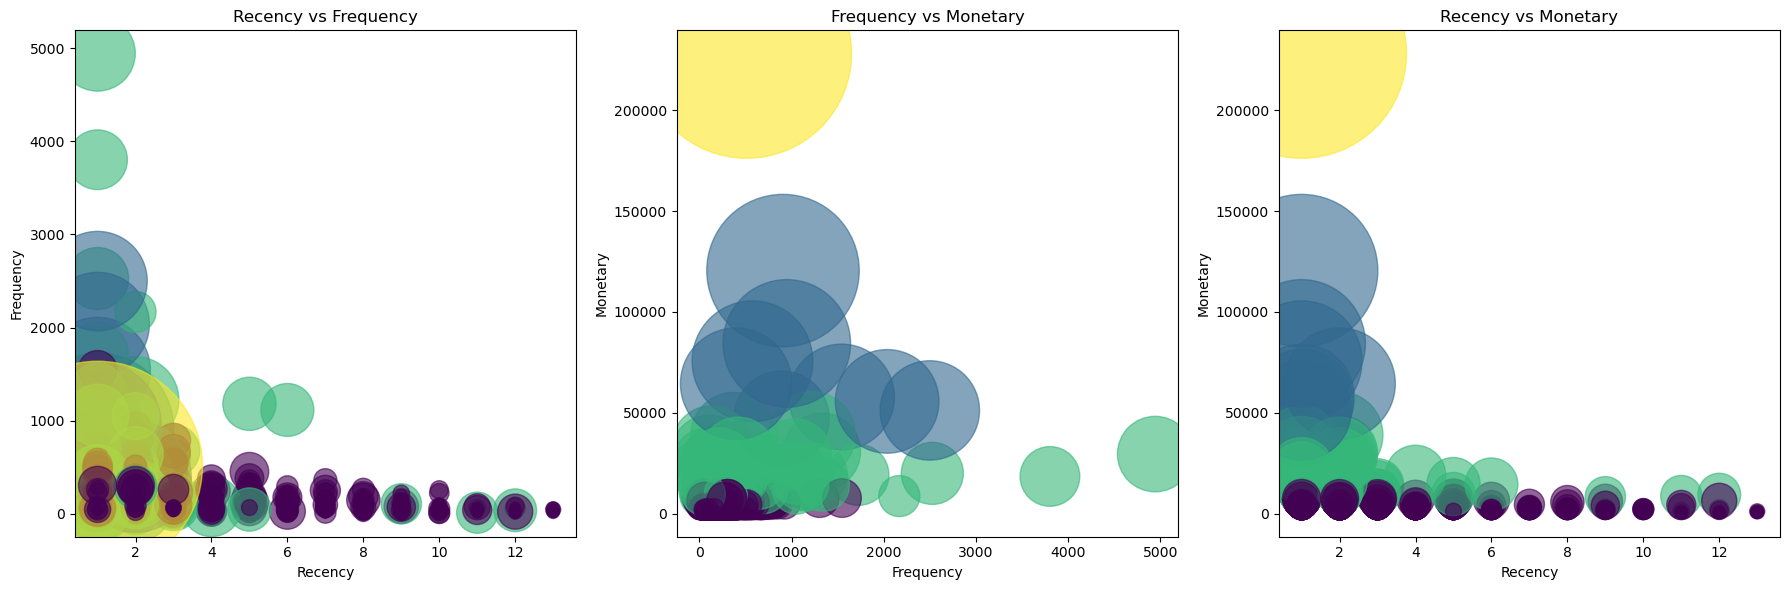

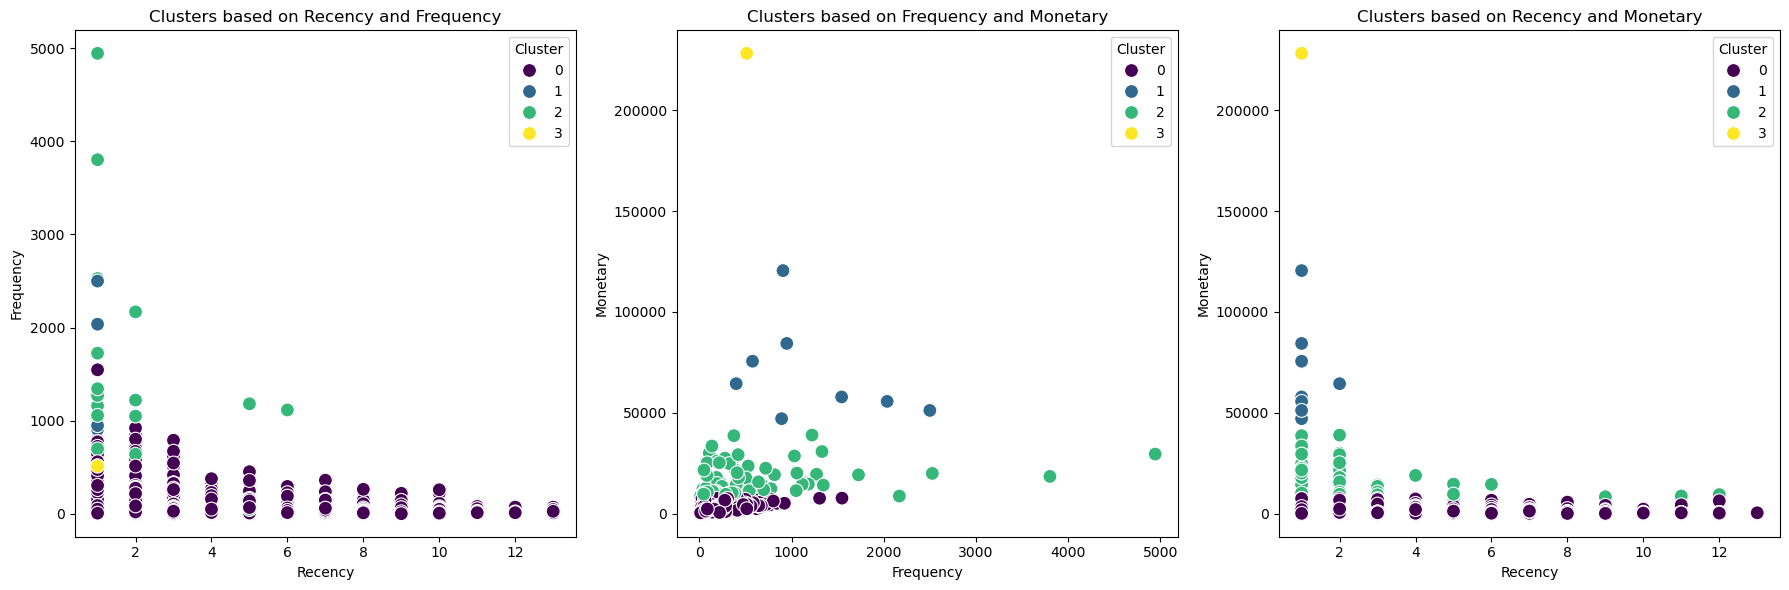

In [154]:
# Bubble matrix visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recency vs Frequency
axes[0].scatter(rfm1['Recency'], rfm1['Frequency'], c=rfm1['Cluster'], cmap='viridis', s=rfm1['Monetary'] / 10, alpha=0.6)
axes[0].set_title('Recency vs Frequency')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')

# Frequency vs Monetary
axes[1].scatter(rfm1['Frequency'], rfm1['Monetary'], c=rfm1['Cluster'], cmap='viridis', s=rfm1['Monetary'] / 10, alpha=0.6)
axes[1].set_title('Frequency vs Monetary')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Monetary')

# Recency vs Monetary
axes[2].scatter(rfm1['Recency'], rfm1['Monetary'], c=rfm1['Cluster'], cmap='viridis', s=rfm1['Monetary'] / 10, alpha=0.6)
axes[2].set_title('Recency vs Monetary')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Monetary')

plt.tight_layout()
plt.show()


# Visualize the clusters with subplots
plt.figure(figsize=(18, 6))

# Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(data=rfm1, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters based on Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(data=rfm1, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters based on Frequency and Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(data=rfm1, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters based on Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()

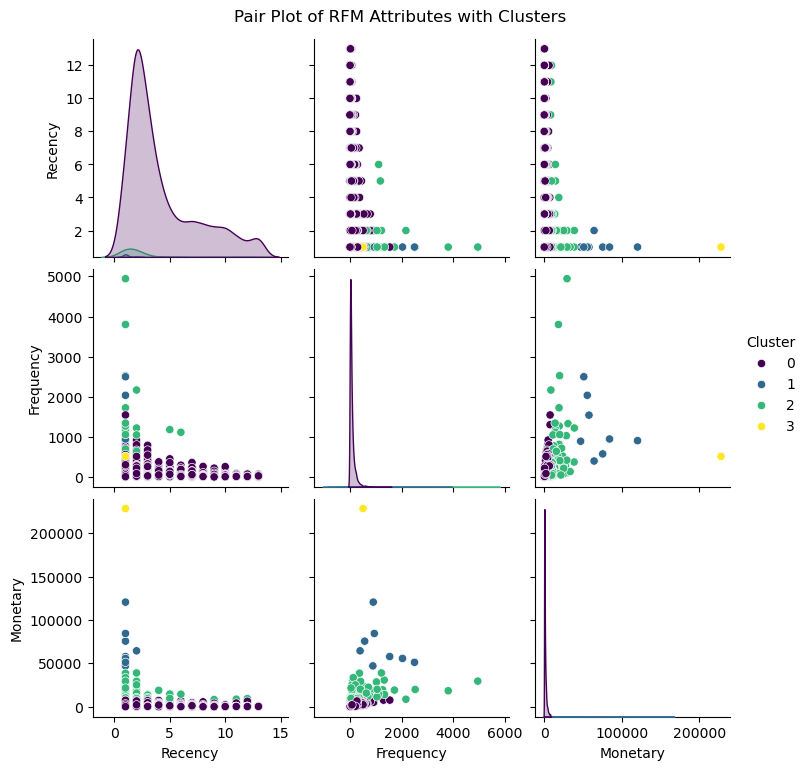

In [142]:
# Pair plot to show the relationships between Recency, Frequency, and Monetary with clusters
sns.pairplot(rfm1, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of RFM Attributes with Clusters', y=1.02)
plt.show()

#### Further analysis we can perform:

- **Customer Lifetime Value (CLV) Estimation**: Predict future revenue from customers to prioritize high-value segments.
- **Churn Prediction**: Identify patterns indicating potential customer churn to implement retention strategies.
- **Market Basket Analysis**: Analyze purchasing patterns to understand product affinities and optimize cross-selling and upselling opportunities.
- **Behavioral Segmentation**: Combine RFM analysis with demographic and behavioral data for more comprehensive customer profiles.
- **A/B Testing**: Validate the effectiveness of targeted marketing strategies on different customer segments identified through RFM and clustering analysis.

I will do these in upcoming projects.


### Companies where customer segmentation played a pivotal role

### Case Study 1: Netflix

**Netflix** uses **Customer Segmentation** to tailor its content recommendations. By analyzing viewing habits, Netflix segments users based on genres they prefer, viewing frequency, and time spent watching. This segmentation allows Netflix to:

- **Personalize Recommendations**: Deliver tailored movie and TV show suggestions to each user segment, increasing engagement.
- **Boost Retention**: Keep users engaged with content that matches their preferences, reducing churn rates.

**Impact**: Netflix's approach has led to higher user satisfaction and increased subscription renewals.

---

### Case Study 2: Starbucks

**Starbucks** applies **RFM Analysis** to enhance its loyalty program. By examining recency, frequency, and monetary spend, Starbucks segments its customers into high-value, frequent visitors and occasional patrons. This segmentation enables Starbucks to:

- **Target High-Value Customers**: Offer exclusive rewards and promotions to frequent buyers, encouraging continued patronage.
- **Personalize Offers**: Tailor marketing messages and special offers based on individual customer behavior.

**Impact**: The strategy has resulted in increased customer retention and higher average spend per visit.

---

### Case Study 3: Sephora

**Sephora** utilizes **Customer Segmentation** and **RFM Analysis** to refine its marketing strategies and enhance customer experience. By segmenting customers based on purchase frequency, spend levels, and recency of last purchase, Sephora can:

- **Design Targeted Campaigns**: Create personalized promotions and product recommendations for different customer segments.
- **Improve Customer Engagement**: Develop loyalty programs and exclusive offers tailored to various segments.

**Impact**: This approach has driven higher engagement rates and increased sales, strengthening Sephora’s market position.
